# NAME : Saswata Bose

### TASK 3: Exploratory Data Analysis - Retail (Level - Beginner) 


#### Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

## Loading The Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib
from sklearn import datasets

# For versioning

# Print Versions for sharing Projects

print(f"Pandas Version : Pandas {pd.__version__}") # Pandas Version Information
print(f"Numpy Version : Numpy {np.__version__}") # Numpy Verison Information
print(f"Matplotlib Version : Matplotlib {matplotlib.__version__}") # Matplotlib Version Information
print(f"Seaborn Version : Seaborn {sns.__version__}") # Seaborn Version Information

%matplotlib inline

Pandas Version : Pandas 1.1.3
Numpy Version : Numpy 1.19.2
Matplotlib Version : Matplotlib 3.3.2
Seaborn Version : Seaborn 0.11.0


In [2]:
from plotly import __version__
import cufflinks as cf

In [3]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
df = pd.read_csv('SampleSuperstore.csv')

In [5]:
df.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [6]:
df.tail()

Ship Mode   Segment        Country         City       State  \
9989    Second Class  Consumer  United States        Miami     Florida   
9990  Standard Class  Consumer  United States   Costa Mesa  California   
9991  Standard Class  Consumer  United States   Costa Mesa  California   
9992  Standard Class  Consumer  United States   Costa Mesa  California   
9993    Second Class  Consumer  United States  Westminster  California   

      Postal Code Region         Category Sub-Category    Sales  Quantity  \
9989        33180  South        Furniture  Furnishings   25.248         3   
9990        92627   West        Furniture  Furnishings   91.960         2   
9991        92627   West       Technology       Phones  258.576         2   
9992        92627   West  Office Supplies        Paper   29.600         4   
9993        92683   West  Office Supplies   Appliances  243.160         2   

      Discount   Profit  
9989       0.2   4.1028  
9990       0.0  15.6332  
9991       0.2  19.3932  
9992       0.0  13.3200  
9993       0.0  72.9480

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
df.duplicated().sum()

17

In [9]:
df.drop_duplicates(keep="first",inplace=True)
df.shape

(9977, 13)

In [10]:
df.describe()

Postal Code         Sales     Quantity     Discount      Profit
count   9977.000000   9977.000000  9977.000000  9977.000000  9977.00000
mean   55154.964117    230.148902     3.790719     0.156278    28.69013
std    32058.266816    623.721409     2.226657     0.206455   234.45784
min     1040.000000      0.444000     1.000000     0.000000 -6599.97800
25%    23223.000000     17.300000     2.000000     0.000000     1.72620
50%    55901.000000     54.816000     3.000000     0.200000     8.67100
75%    90008.000000    209.970000     5.000000     0.200000    29.37200
max    99301.000000  22638.480000    14.000000     0.800000  8399.97600

In [11]:
correlation = df.corr()
correlation

Postal Code     Sales  Quantity  Discount    Profit
Postal Code     1.000000 -0.023476  0.013110  0.059225 -0.029892
Sales          -0.023476  1.000000  0.200722 -0.028311  0.479067
Quantity        0.013110  0.200722  1.000000  0.008678  0.066211
Discount        0.059225 -0.028311  0.008678  1.000000 -0.219662
Profit         -0.029892  0.479067  0.066211 -0.219662  1.000000

<AxesSubplot:>

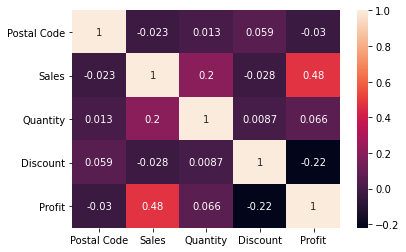

In [12]:
sns.heatmap(correlation,annot=True)

In [13]:
df_con = df.select_dtypes(include=[np.number])

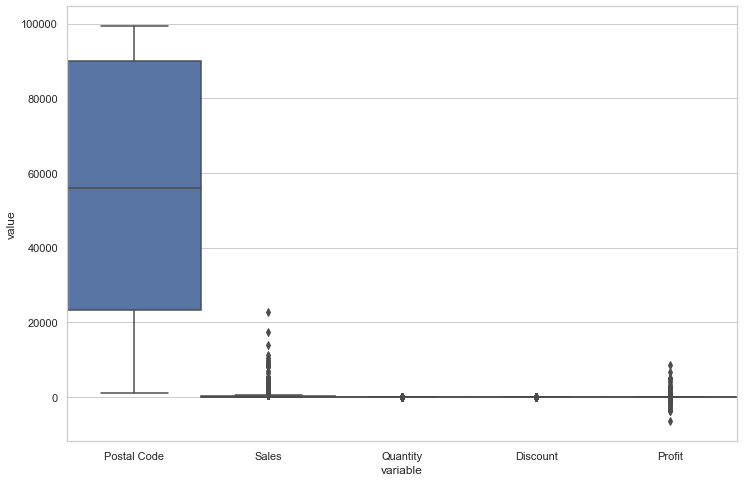

In [14]:
#BoxPlot 
plt.figure(figsize=[12,8])
sns.set(style="whitegrid")
sns.boxplot(x="variable",y="value",data=pd.melt(df_con),width=1)

plt.show()

In [15]:
df_con.iplot(kind='box')

In [16]:
def remove_outlier(dataset,k=3.33):
    for col in dataset.columns:
        if(dataset[col].dtype=='int64' or dataset[col].dtype=='float64'):
            mean = dataset[col].mean()
            global ds
            std = df[col].std()
            outlier = [i for i in df[col] if (i > mean - k * std)]
            outlier = [i for i in outlier if (i < mean + k * std)]
            ds = df.loc[df[col].isin(outlier)]

In [17]:
remove_outlier(df,k=3.33)

In [18]:
ds_con = ds.select_dtypes(include=[np.number])
ds_con.iplot(kind='box')

In [19]:
ds.shape

(9889, 13)

In [20]:
ds.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [21]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9889 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9889 non-null   object 
 1   Segment       9889 non-null   object 
 2   Country       9889 non-null   object 
 3   City          9889 non-null   object 
 4   State         9889 non-null   object 
 5   Postal Code   9889 non-null   int64  
 6   Region        9889 non-null   object 
 7   Category      9889 non-null   object 
 8   Sub-Category  9889 non-null   object 
 9   Sales         9889 non-null   float64
 10  Quantity      9889 non-null   int64  
 11  Discount      9889 non-null   float64
 12  Profit        9889 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [22]:
for col in ds.columns:
    if ds[col].dtype=='object':
        print("Number of Unique Entries in",col + " are",ds[col].nunique())
        print("----------------------------------------------")

Number of Unique Entries in Ship Mode are 4
----------------------------------------------
Number of Unique Entries in Segment are 3
----------------------------------------------
Number of Unique Entries in Country are 1
----------------------------------------------
Number of Unique Entries in City are 531
----------------------------------------------
Number of Unique Entries in State are 49
----------------------------------------------
Number of Unique Entries in Region are 4
----------------------------------------------
Number of Unique Entries in Category are 3
----------------------------------------------
Number of Unique Entries in Sub-Category are 17
----------------------------------------------


In [23]:
#Visualisation
ds.iplot(x='Region',y='Sales',kind='bar',title='Region VS Sales',xTitle='Region',yTitle='Sales')

In [24]:
ds.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [25]:
ds['Sub-Category'].value_counts()

Binders        1489
Paper          1359
Furnishings     956
Phones          887
Storage         846
Art             795
Accessories     774
Chairs          615
Appliances      464
Labels          363
Tables          315
Envelopes       254
Bookcases       225
Fasteners       217
Supplies        188
Machines         92
Copiers          50
Name: Sub-Category, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

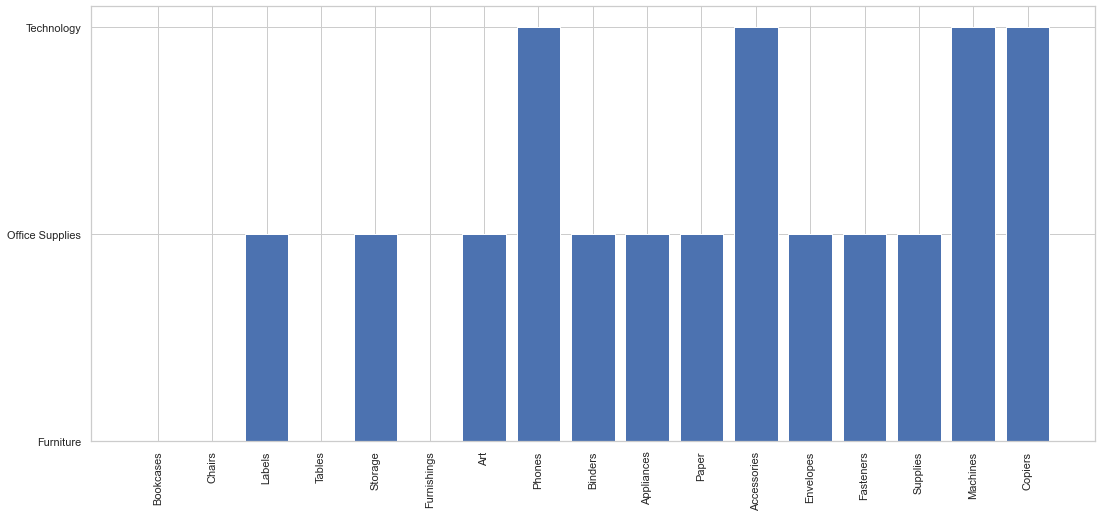

In [26]:
plt.figure(figsize=(18,8))
plt.bar('Sub-Category','Category',data=ds)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

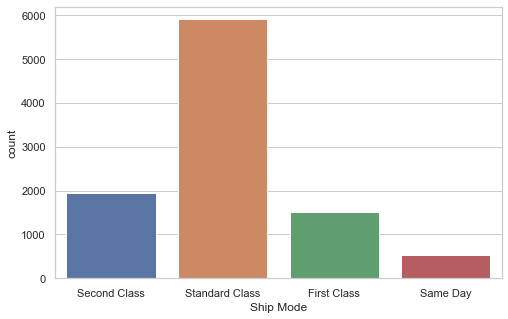

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(x=ds['Ship Mode'])

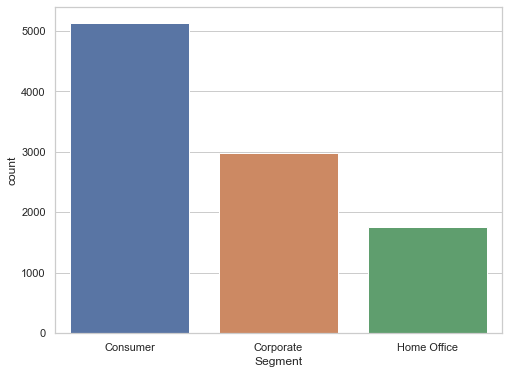

In [28]:
plt.figure(figsize=(8,6))
sns.countplot(x=ds['Segment'])
plt.show()

C:\Users\Saswata Bose\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



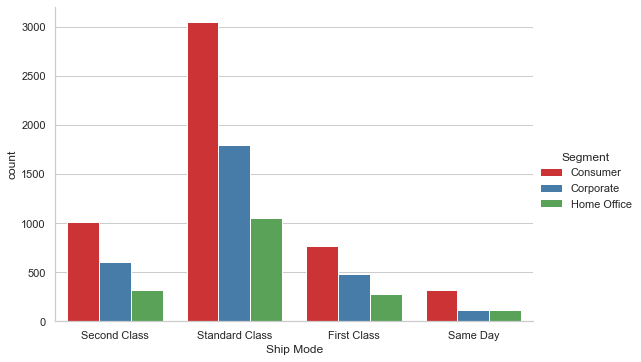

In [29]:
sns.catplot("Ship Mode",hue="Segment",data=ds,kind="count",aspect=1.5,palette="Set1")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'New York City'),
  Text(1, 0, 'Los Angeles'),
  Text(2, 0, 'Philadelphia'),
  Text(3, 0, 'San Francisco'),
  Text(4, 0, 'Seattle'),
  Text(5, 0, 'Houston'),
  Text(6, 0, 'Chicago'),
  Text(7, 0, 'Columbus'),
  Text(8, 0, 'San Diego'),
  Text(9, 0, 'Springfield'),
  Text(10, 0, 'Dallas'),
  Text(11, 0, 'Jacksonville'),
  Text(12, 0, 'Detroit'),
  Text(13, 0, 'Newark'),
  Text(14, 0, 'Richmond'),
  Text(15, 0, 'Jackson'),
  Text(16, 0, 'Columbia'),
  Text(17, 0, 'Aurora'),
  Text(18, 0, 'Phoenix'),
  Text(19, 0, 'Long Beach'),
  Text(20, 0, 'Arlington'),
  Text(21, 0, 'Louisville'),
  Text(22, 0, 'Miami'),
  Text(23, 0, 'San Antonio'),
  Text(24, 0, 'Rochester'),
  Text(25, 0, 'Henderson'),
  Text(26, 0, 'Charlotte'),
  Text(27, 0, 'Lakewood'),
  Text(

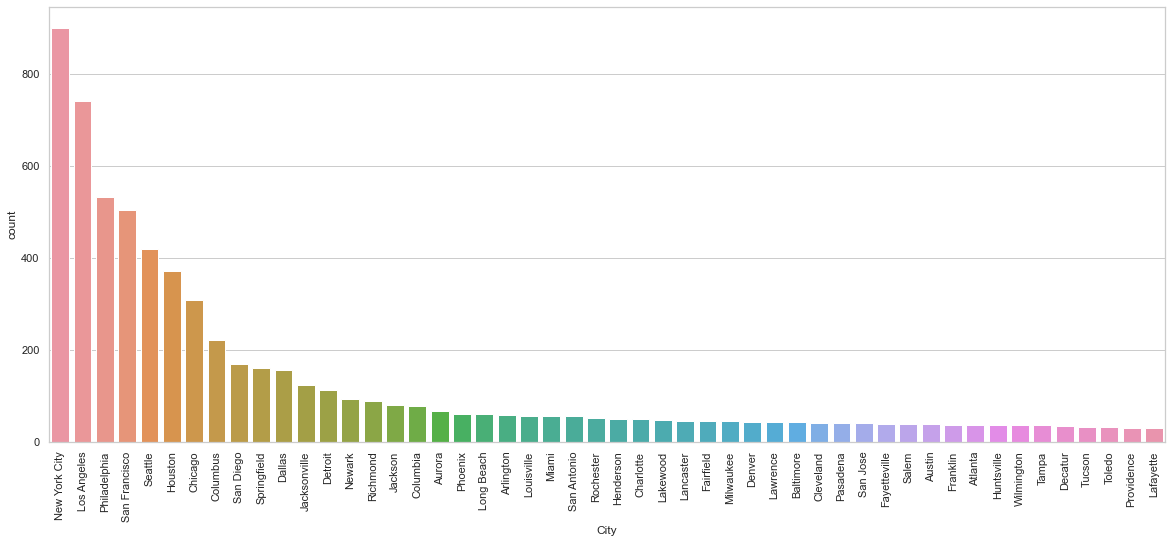

In [30]:
plt.figure(figsize=(20,8))
sns.countplot(x=ds['City'],order=(ds['City'].value_counts().head(50)).index)
plt.xticks(rotation=90)

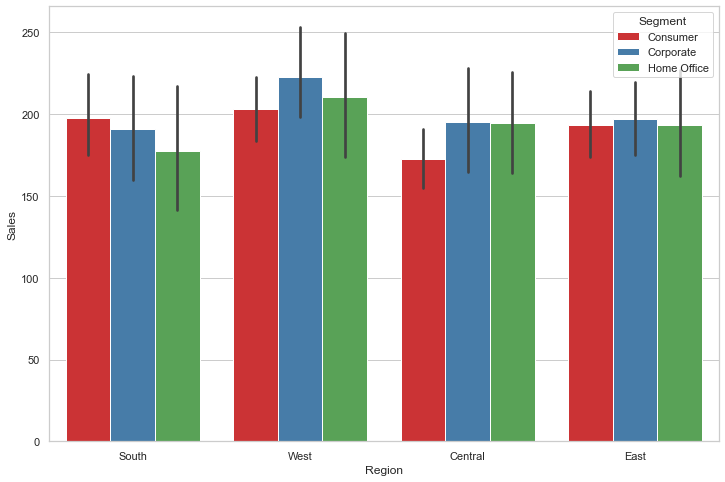

In [31]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region",y="Sales",hue="Segment",data=ds,palette="Set1")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, 'Kentucky'),
  Text(1, 0, 'California'),
  Text(2, 0, 'Florida'),
  Text(3, 0, 'North Carolina'),
  Text(4, 0, 'Washington'),
  Text(5, 0, 'Texas'),
  Text(6, 0, 'Wisconsin'),
  Text(7, 0, 'Utah'),
  Text(8, 0, 'Nebraska'),
  Text(9, 0, 'Pennsylvania'),
  Text(10, 0, 'Illinois'),
  Text(11, 0, 'Minnesota'),
  Text(12, 0, 'Michigan'),
  Text(13, 0, 'Delaware'),
  Text(14, 0, 'Indiana'),
  Text(15, 0, 'New York'),
  Text(16, 0, 'Arizona'),
  Text(17, 0, 'Virginia'),
  Text(18, 0, 'Tennessee'),
  Text(19, 0, 'Alabama'),
  Text(20, 0, 'South Carolina'),
  Text(21, 0, 'Oregon'),
  Text(22, 0, 'Colorado'),
  Text(23, 0, 'Iowa'),
  Text(24, 0, 'Ohio'),
  Text(25, 0, 'Missouri'),
  Text(26, 0, 'Oklahoma'),
  Text(27, 0, 'New Mexico'),
  Text(28, 0, 'Louisiana'),


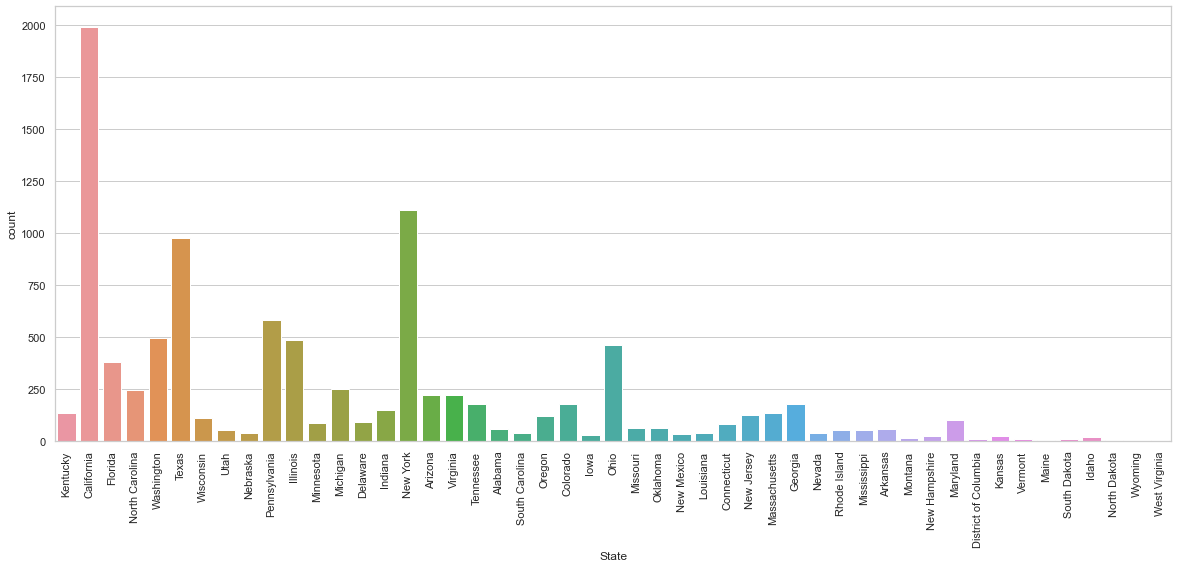

In [32]:
plt.figure(figsize=(20,8))
sns.countplot(x=ds['State'])
plt.xticks(rotation=90)

In [33]:
ds.iplot(x='Sub-Category',y='Sales',kind='bar',colors='orange',
        title='Sub_Category VS Sales',xTitle='Sub_Category',yTitle='Sales')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Bookcases'),
  Text(1, 0, 'Chairs'),
  Text(2, 0, 'Labels'),
  Text(3, 0, 'Tables'),
  Text(4, 0, 'Storage'),
  Text(5, 0, 'Furnishings'),
  Text(6, 0, 'Art'),
  Text(7, 0, 'Phones'),
  Text(8, 0, 'Binders'),
  Text(9, 0, 'Appliances'),
  Text(10, 0, 'Paper'),
  Text(11, 0, 'Accessories'),
  Text(12, 0, 'Envelopes'),
  Text(13, 0, 'Fasteners'),
  Text(14, 0, 'Supplies'),
  Text(15, 0, 'Machines'),
  Text(16, 0, 'Copiers')])

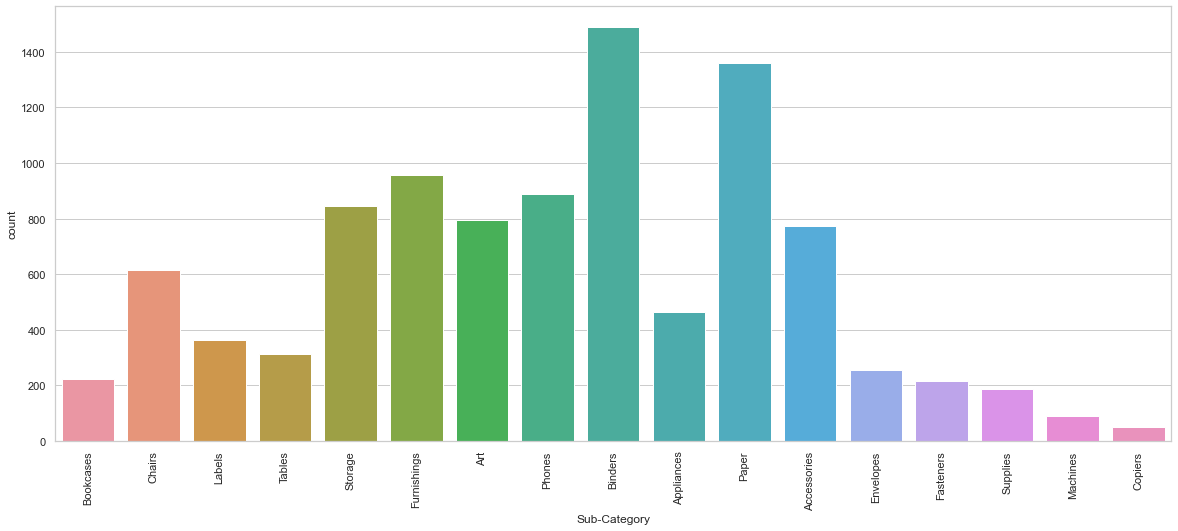

In [34]:
plt.figure(figsize=(20,8))
sns.countplot(x=ds['Sub-Category'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Bookcases'),
  Text(1, 0, 'Chairs'),
  Text(2, 0, 'Labels'),
  Text(3, 0, 'Tables'),
  Text(4, 0, 'Storage'),
  Text(5, 0, 'Furnishings'),
  Text(6, 0, 'Art'),
  Text(7, 0, 'Phones'),
  Text(8, 0, 'Binders'),
  Text(9, 0, 'Appliances'),
  Text(10, 0, 'Paper'),
  Text(11, 0, 'Accessories'),
  Text(12, 0, 'Envelopes'),
  Text(13, 0, 'Fasteners'),
  Text(14, 0, 'Supplies'),
  Text(15, 0, 'Machines'),
  Text(16, 0, 'Copiers')])

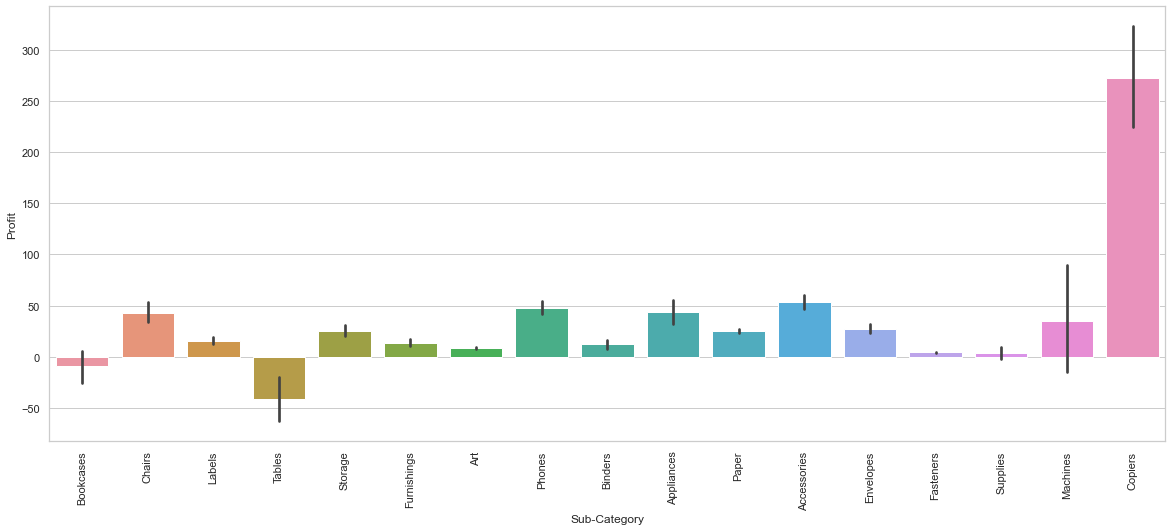

In [35]:
plt.figure(figsize=(20,8))
sns.barplot(x=ds['Sub-Category'],y=ds['Profit'])
plt.xticks(rotation=90)

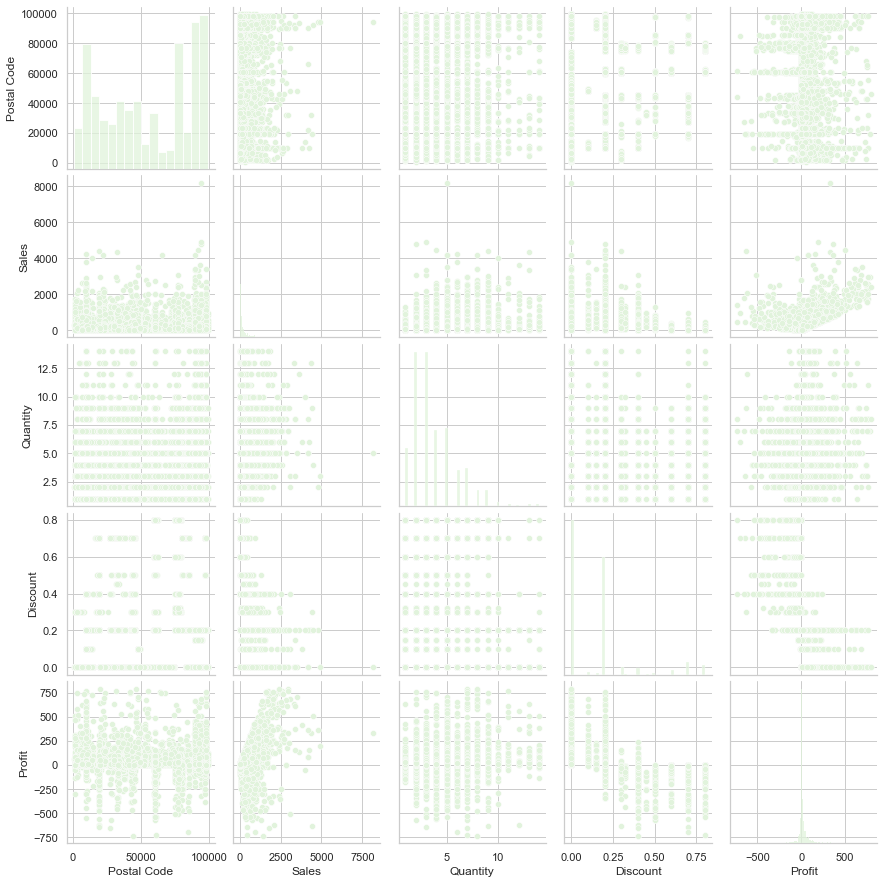

In [36]:
sns.set_palette('Greens')
sns.pairplot(ds)

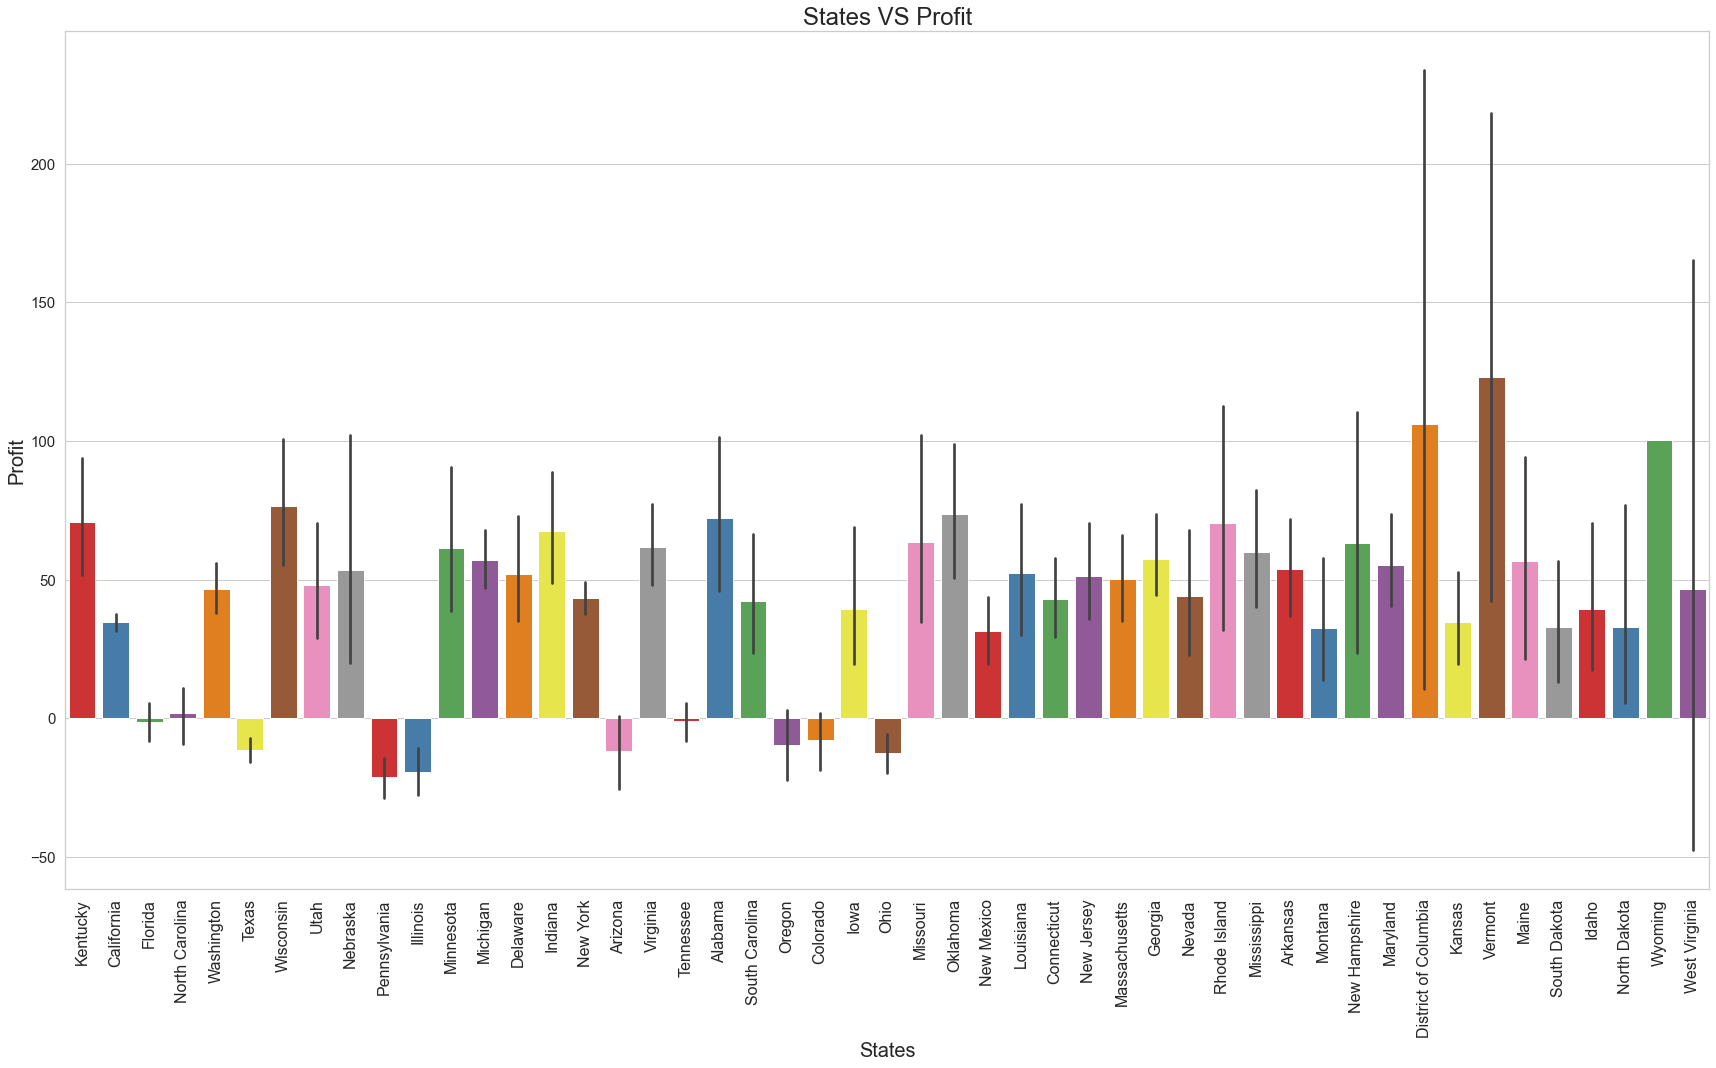

In [37]:
plt.figure(figsize=[24,15])
ax = sns.barplot(x="State",y="Profit",data=ds,palette="Set1")
plt.xticks(rotation=90,fontsize=16)
plt.yticks(fontsize=15)
plt.title("States VS Profit",fontsize=24)
plt.xlabel("States",fontsize=20)
plt.ylabel("Profit",fontsize=20)
plt.tight_layout()

In [38]:
ds.iplot(kind="bar",x="Category",y="Profit",title="Category VS Profit",xTitle="Category",yTitle="Profit",colors='magenta')

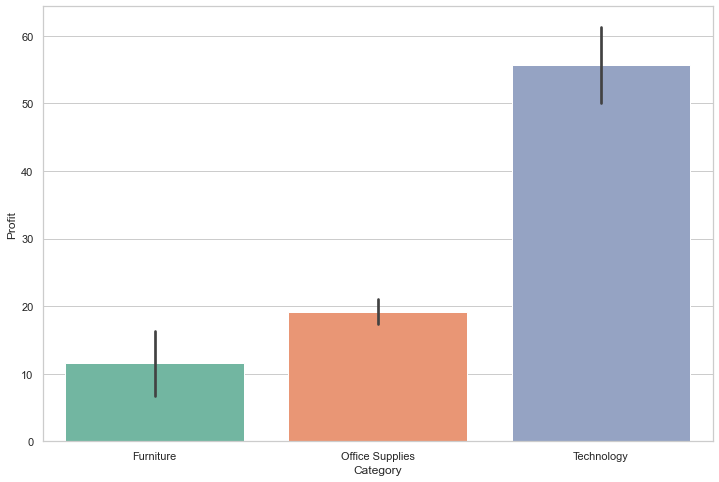

In [39]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Category",y="Profit",data=ds,palette="Set2")

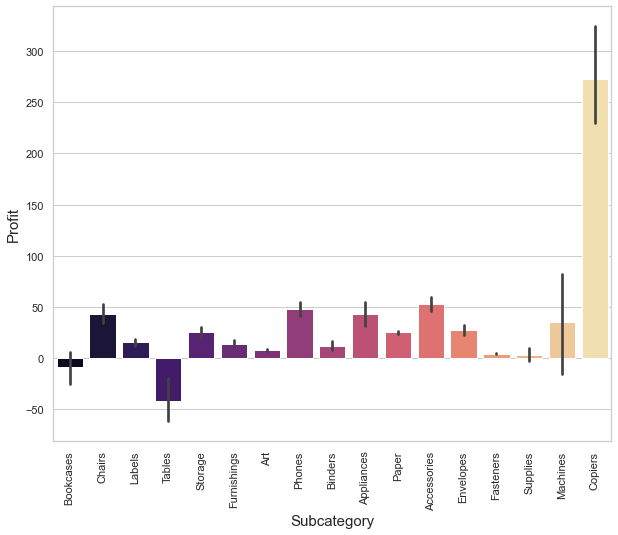

In [40]:
plt.figure(figsize=[10,8])
ax = sns.barplot(x="Sub-Category",y='Profit',data=ds,palette="magma")
plt.xlabel("Subcategory",fontsize=15)
plt.ylabel("Profit",fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [41]:
ds_tech = ds[(ds['Category']=='Technology')]

Text(0, 0.5, 'Sales')

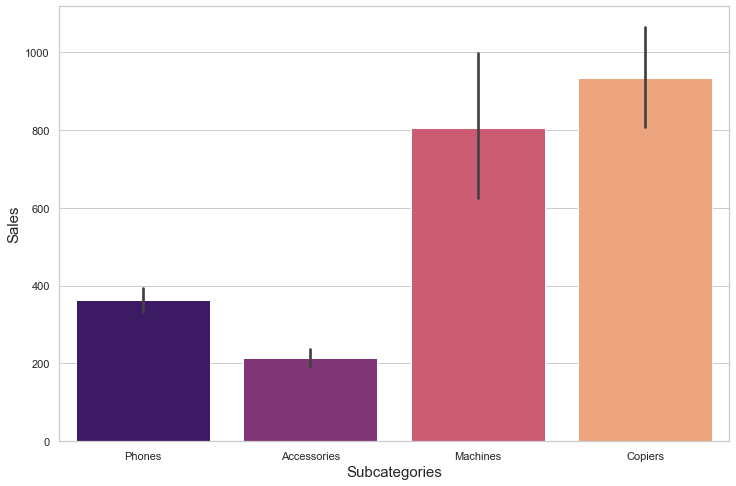

In [42]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Sub-Category",y="Sales",data=ds_tech,palette="magma")
plt.xlabel("Subcategories",fontsize=15)
plt.ylabel("Sales",fontsize=15)

Text(0, 0.5, 'Profit')

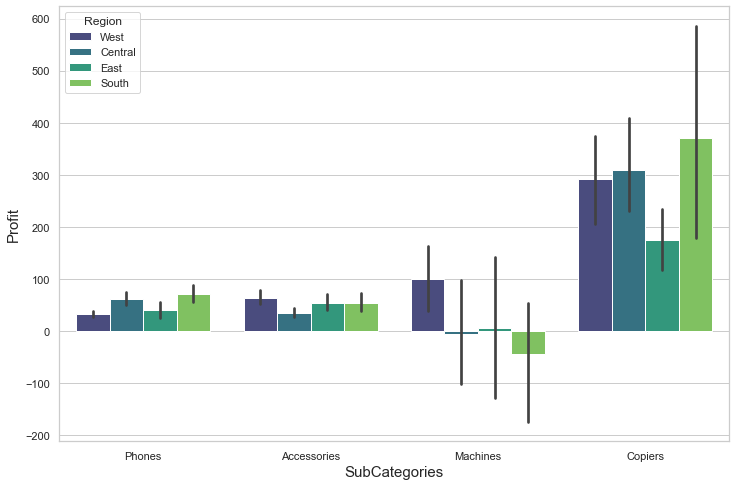

In [43]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Sub-Category",y="Profit",hue="Region",data=ds_tech,palette="viridis")
plt.xlabel("SubCategories",fontsize=15)
plt.ylabel("Profit",fontsize=15)

Text(0, 0.5, 'Profit')

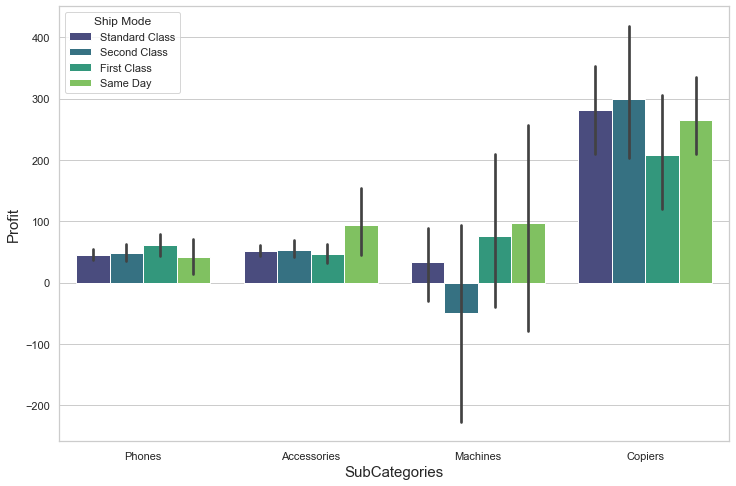

In [44]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Sub-Category",y="Profit",hue="Ship Mode",data=ds_tech,palette="viridis")
plt.xlabel("SubCategories",fontsize=15)
plt.ylabel("Profit",fontsize=15)